In [3]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from lmfit.lineshapes import *
from lmfit.models import GaussianModel, LorentzianModel, ExponentialModel, PolynomialModel, VoigtModel
from scipy import signal as sig
from scipy import optimize as opt
import peakutils

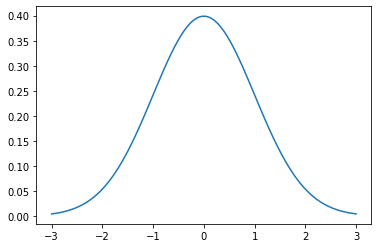

In [4]:
# Define basic gaussian function: A = amplitude, mu = mean, sigma = standard deviation
def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

# Generate example data and plot gaussian function
x = np.linspace(-3, 3, 100)
y = g(x, 1, 0, 1) 
fig, ax = plt.subplots()
ax.plot(x, g(x, 1, 0, 1))

In [5]:
# Load the pre-built gaussian model found with the lmfit module.
model = GaussianModel()
pars = model.guess(y, x=x)  #The parameters for the gaussian module (amplitude, mean, sigma) are guessed by input
out = model.fit(y, pars, x=x) # Fit of gaussian model to input data

In [6]:
print(out.fit_report(min_correl = 0.25)) # Fit Report

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 100
    # variables        = 3
    chi-square         = 2.8257e-31
    reduced chi-square = 2.9131e-33
    Akaike info crit   = -7488.65465
    Bayesian info crit = -7480.83914
##  Warning: uncertainties could not be estimated:
    center:     at initial value
[[Variables]]
    amplitude:  1.00000000 (init = 1.326374)
    center:     7.0119e-17 (init = 7.011935e-17)
    sigma:      1.00000000 (init = 1.121212)
    fwhm:       2.35482000 == '2.3548200*sigma'
    height:     0.39894230 == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


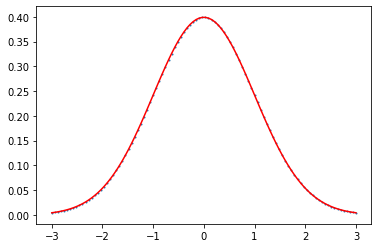

In [7]:
# Plot of original data and gaussian model fit
plt.scatter(x, y, 1)
plt.plot(x, out.best_fit, color = 'red')
plt.show()

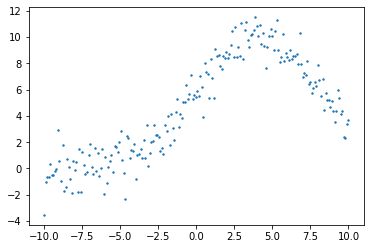

In [8]:
# Generate a gaussian function with a random spread in data points
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)

In [9]:
# Generate gaussian model based on initial guess from the data
model1 = GaussianModel()
pars1 = model1.guess(y, x=x)
out1 = model1.fit(y, pars1, x=x)
print(out1.fit_report(min_correl  = 25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 200
    # variables        = 3
    chi-square         = 210.689470
    reduced chi-square = 1.06948970
    Akaike info crit   = 16.4135955
    Bayesian info crit = 26.3085476
[[Variables]]
    amplitude:  98.9448554 +/- 1.66759503 (1.69%) (init = 258.4539)
    center:     4.11818892 +/- 0.07356527 (1.79%) (init = 4.095477)
    sigma:      3.91255176 +/- 0.08097904 (2.07%) (init = 5.728643)
    fwhm:       9.21335514 +/- 0.19069107 (2.07%) == '2.3548200*sigma'
    height:     10.0888859 +/- 0.15702716 (1.56%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'


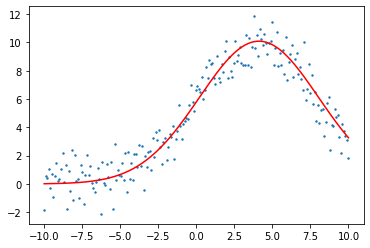

In [10]:
A = 100.0 # intensity
μ = 4.0  # mean
σ = 4.0 # peak width
n = 200
x = np.linspace(-10, 10, n)
y = g(x, A, μ, σ) + np.random.randn(n)
fig, ax = plt.subplots()
ax.scatter(x, y, s=2)
plt.plot(x, out1.best_fit, color = 'red') # Plot of best fit

In [11]:
# Generation of random set of input data
np.random.seed(0)
x = np.linspace(0, 20.0, 601)

# Generate a multipeak function consisting of gaussian and lorentzian peaks
data = (gaussian(x, 21, 6.1, 1.2) + gaussian(x, 10, 9.6, 1.3) + lorentzian(x, 32, 15, 1) +
        np.random.normal(scale=0.1, size=x.size))

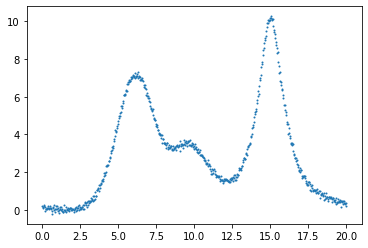

In [12]:
plt.scatter(x, data, 1)

In [13]:
# Create models

gauss_1 = GaussianModel(prefix = 'g1_')  #First Gaussian Model using input data for initial parameter guess
par = gauss_1.guess(data, x = x)

gauss_2 = GaussianModel(prefix = 'g2_') #Second Gaussian Model updating parameters from first fit
par.update(gauss_2.make_params())

par['g2_center'].set(value = 10.0, min = 7.5, max = 12.0) # Setting mean for second gaussian with min/max range
par['g2_sigma'].set(value = 4, min = 0.1) # Setting deviation for second gaussian with min value limit
par['g2_amplitude'].set(value = 20, min = 1) # Setting amplitude for second gaussian with min value limit

lorentzian = LorentzianModel(prefix = 'l1_') # Lorentzian model
par.update(lorentzian.make_params())

par['l1_center'].set(value = 15.0, min = 13.5, max = 18.0) # Initial guess for the mean, amplitude and sigma
par['l1_sigma'].set(value = 4.0, min = 1)
par['l1_amplitude'].set(value = 40, min = 9.0)

In [14]:
model = gauss_1 + gauss_2 + lorentzian  # Combined model for the data
out = model.fit(data, par, x = x) # Best fit of input data
print(out.fit_report())

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(lorentzian, prefix='l1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7471
    # data points      = 601
    # variables        = 9
    chi-square         = 6.96927973
    reduced chi-square = 0.01177243
    Akaike info crit   = -2660.70692
    Bayesian info crit = -2621.11956
##  Warning: uncertainties could not be estimated:
    l1_sigma:      at boundary
[[Variables]]
    g1_amplitude: -7500.64092 (init = 171.0675)
    g1_center:     7.73015157 (init = 10.5062)
    g1_sigma:      1.46423496 (init = 5.45)
    g1_fwhm:       3.44800977 == '2.3548200*g1_sigma'
    g1_height:    -2043.60845 == '0.3989423*g1_amplitude/max(2.220446049250313e-16, g1_sigma)'
    g2_amplitude:  7531.66384 (init = 20)
    g2_center:     7.72789536 (init = 10)
    g2_sigma:      1.46754599 (init = 4)
    g2_fwhm:       3.45580664 == '2.3548200*g2_sigma'
    g2_height:     2047.43110 == '0.398

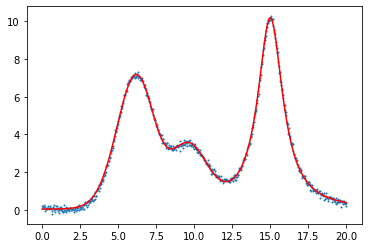

In [15]:
plt.scatter(x, data, 1)
plt.plot(x, out.best_fit, color = 'red')

In [16]:
# Load silicon sample
csv  = pd.read_csv('Phys-PK1_Si.csv', header = 29).to_numpy()

In [17]:
Si_x_data = csv[:, 0]
Si_y_data = csv[:, 1]
print(len(Si_x_data))
print(len(Si_y_data))

3529
3529


In [18]:
def smooth(data, win_size, polynomial):  # win_size = no. of data points of subset, polynomial = degree of polynomail
    smoothed_data = sig.savgol_filter(data, win_size, polynomial)
    return smoothed_data

y_smooth = smooth(Si_y_data, 9, 1)

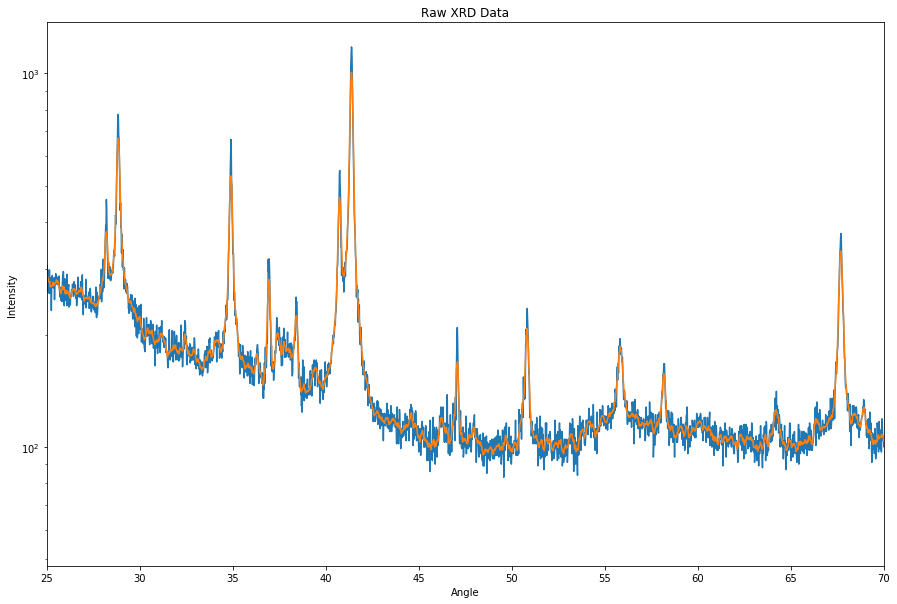

In [19]:
plt.subplots(figsize=(15, 10))
plt.plot(Si_x_data, Si_y_data)
plt.plot(Si_x_data, y_smooth)
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Raw XRD Data')
plt.xlim(25, 70)
plt.show()

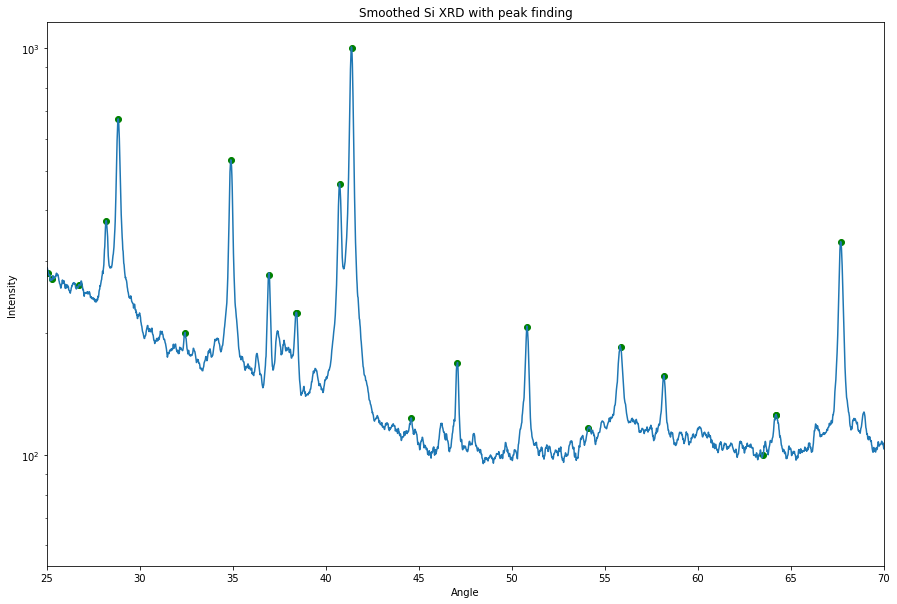

In [20]:
# Find peaks within data: adjust widths, gap_thresh, min_snr and noise_perc to achive optimum number of points

peak_indicies = sig.find_peaks_cwt(y_smooth, widths = (4, 15), gap_thresh = 4, min_snr = 1.7, noise_perc = 10)
quantile = np.quantile(Si_y_data, .60)
mean = np.mean(Si_y_data)

plt.subplots(figsize=(15, 10))
plt.plot(Si_x_data , y_smooth)
plt.scatter(Si_x_data[peak_indicies], y_smooth[peak_indicies], color = 'green')
plt.yscale('log')
plt.xlabel('Angle')
plt.ylabel('Intensity')
plt.title('Smoothed Si XRD with peak finding')
plt.xlim(25, 70)
plt.show()

In [21]:
data_peaks = pd.DataFrame([Si_x_data[peak_indicies], y_smooth[peak_indicies]])
data_peaks = data_peaks.transpose()
data_peaks.columns = ['X_data', 'Y_data']

print(data_peaks.head())

   X_data      Y_data
0  25.083  280.222222
1  25.270  270.777778
2  26.749  262.111111
3  28.194  376.777778
4  28.840  669.444444


In [22]:
print(quantile)
print(mean)
    

120.0
141.24681212808161


In [23]:
data_peaks.drop(data_peaks[data_peaks.Y_data < quantile].index, inplace = True)

In [24]:
print(data_peaks.head())

   X_data      Y_data
0  25.083  280.222222
1  25.270  270.777778
2  26.749  262.111111
3  28.194  376.777778
4  28.840  669.444444


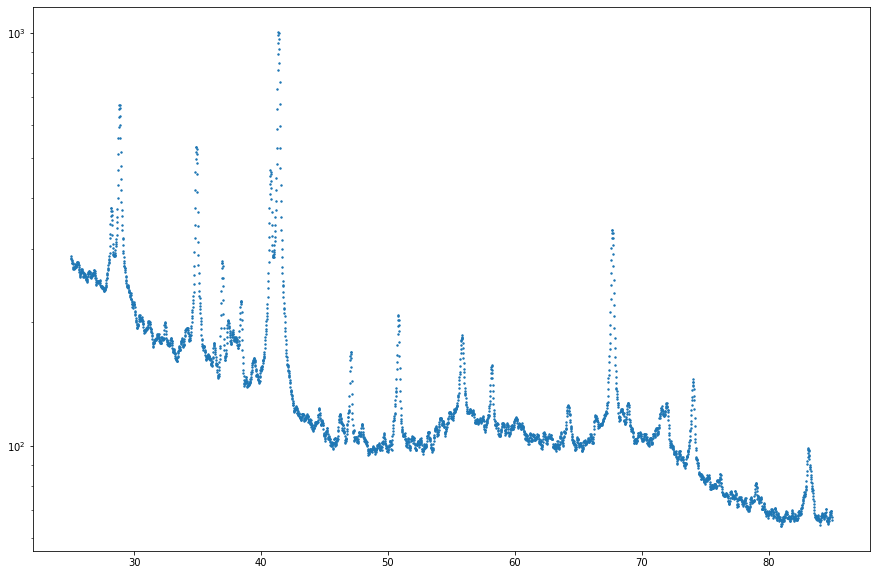

In [25]:
reduced_data_x = data_peaks['X_data'].to_numpy()
reduced_data_y = data_peaks['Y_data'].to_numpy()
#print(reduced_data_x, reduced_data_y)


plt.subplots(figsize = (15, 10))
plt.scatter(Si_x_data, y_smooth, s = 2)
plt.yscale('log')
#plt.scatter(reduced_data_x, reduced_data_y, color = 'red')

In [28]:
# Model

poly = PolynomialModel(4, prefix = 'poly_')
par = poly.guess(y_smooth, x = Si_x_data)

voigt_1 = VoigtModel(prefix = 'v1_')
par.update(voigt_1.make_params())
par['v1_center'].set(value = 28.0)
par['v1_sigma'].set(value = 20.0)
par['v1_amplitude'].set(value = 500.0)

voigt_2 = VoigtModel(prefix = 'v2_')
par.update(voigt_2.make_params())
par['v2_center'].set(value = 35.0)
par['v2_sigma'].set(value = 20.0)
par['v2_amplitude'].set(value = 500.0)

voigt_3 = VoigtModel(prefix = 'v3_')
par.update(voigt_3.make_params())
par['v3_center'].set(value = 38.0)
par['v3_sigma'].set(value = 20.0)
par['v3_amplitude'].set(value = 500.0)

voigt_4 = VoigtModel(prefix = 'v4_')
par.update(voigt_4.make_params())
par['v4_center'].set(value = 40)
par['v4_sigma'].set(value = 20.0)
par['v4_amplitude'].set(value = 500.0)

voigt_5 = VoigtModel(prefix = 'v5_')
par.update(voigt_5.make_params())
par['v5_center'].set(value = 48.0)
par['v5_sigma'].set(value = 20.0)
par['v5_amplitude'].set(value = 500.0)

voigt_6 = VoigtModel(prefix = 'v6_')
par.update(voigt_6.make_params())
par['v6_center'].set(value = 51.0)
par['v6_sigma'].set(value = 20.0)
par['v6_amplitude'].set(value = 500.0)

voigt_7 = VoigtModel(prefix = 'v7_')
par.update(voigt_7.make_params())
par['v7_center'].set(value = 55.0)
par['v7_sigma'].set(value = 20.0)
par['v7_amplitude'].set(value = 500.0)

voigt_8 = VoigtModel(prefix = 'v8_')
par.update(voigt_8.make_params())
par['v8_center'].set(value = 58.0)
par['v8_sigma'].set(value = 20.0)
par['v8_amplitude'].set(value = 500.0)

voigt_9 = VoigtModel(prefix = 'v9_')
par.update(voigt_9.make_params())
par['v9_center'].set(value = 65.0)
par['v9_sigma'].set(value = 20.0)
par['v9_amplitude'].set(value = 500.0)

voigt_10 = VoigtModel(prefix = 'v10_')
par.update(voigt_10.make_params())
par['v10_center'].set(value = 68.0)
par['v10_sigma'].set(value = 20.0)
par['v10_amplitude'].set(value = 500.0)

voigt_11 = VoigtModel(prefix = 'v11_')
par.update(voigt_11.make_params())
par['v11_center'].set(value = 72.0)
par['v11_sigma'].set(value = 20.0)
par['v11_amplitude'].set(value = 500.0)

voigt_12 = VoigtModel(prefix = 'v12_')
par.update(voigt_12.make_params())
par['v12_center'].set(value = 75.0)
par['v12_sigma'].set(value = 20.0)
par['v12_amplitude'].set(value = 500.0)

voigt_13 = VoigtModel(prefix = 'v13_')
par.update(voigt_13.make_params())
par['v13_center'].set(value = 83.0)
par['v13_sigma'].set(value = 20.0)
par['v13_amplitude'].set(value = 500.0)




model =  voigt_1 + voigt_2 + voigt_3 + voigt_4 + voigt_5 + voigt_6 + voigt_7 + voigt_8 + voigt_9 + voigt_10 + voigt_11 + voigt_12+ voigt_13 + poly
out = model.fit(y_smooth, par, x=Si_x_data)

print(out.fit_report())

[[Model]]
    (((((((((((((Model(voigt, prefix='v1_') + Model(voigt, prefix='v2_')) + Model(voigt, prefix='v3_')) + Model(voigt, prefix='v4_')) + Model(voigt, prefix='v5_')) + Model(voigt, prefix='v6_')) + Model(voigt, prefix='v7_')) + Model(voigt, prefix='v8_')) + Model(voigt, prefix='v9_')) + Model(voigt, prefix='v10_')) + Model(voigt, prefix='v11_')) + Model(voigt, prefix='v12_')) + Model(voigt, prefix='v13_')) + Model(polynomial, prefix='poly_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 90018
    # data points      = 3529
    # variables        = 44
    chi-square         = 624577.969
    reduced chi-square = 179.218930
    Akaike info crit   = 18354.3215
    Bayesian info crit = 18625.7474
##  Warning: uncertainties could not be estimated:
[[Variables]]
    poly_c0:        207.874257 (init = 254.547)
    poly_c1:        21.2604111 (init = 16.94628)
    poly_c2:       -0.84534698 (init = -0.9735406)
    poly_c3:        0.01707951 (init = 0.015840

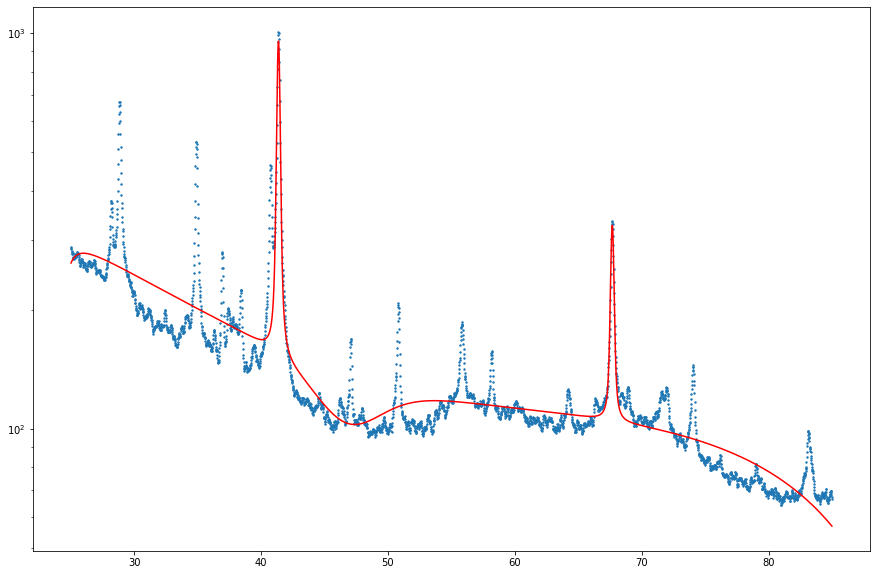

In [27]:
plt.subplots(figsize = (15, 10))
plt.scatter(Si_x_data, y_smooth, s = 2)
plt.yscale('log')

plt.plot(Si_x_data, out.best_fit, color = 'red')